# Tweets Analysis of Two Australian Politicians 
-Senator Penny Wong (Leader of the Government in the Senate Minister for Foreign Affairs)     
-Peter Dutton(Leader of the Opposition,Minister for Defence till May 2022)

## Lei Yang

In [225]:
import tweepy
import pandas as pd
import json
from matplotlib import pyplot as plt
import seaborn as sn
import warnings
import numpy as np
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
warnings.filterwarnings("ignore")


In [2]:
twitter_keys= {
'consumer_key': 'OsXKBsfj3xhCXFOQh7DXDtE73', 
'consumer_secret': 'e9BUmiamVN3ugUQd8nA3Qu3TnZhBn3UWNAuzbaXntAAPJ5Fs5S',
'access_token_key': '1573919604975362048-Mi2DBjYVUoFnEjobV5LREsw9jfmyN0',
'access_token_secret':'oqwCG5dMZHUEi6BTdAqHlzxRoVcCx5pcpzm8tQptYjhyl'
}
auth = tweepy.OAuthHandler(twitter_keys['consumer_key'],
twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'],
twitter_keys['access_token_secret'])
api= tweepy.API(auth, wait_on_rate_limit= True)

### Tweets1 - Senator Penny Wong (Leader of the Government in the Senate Minister for Foreign Affairs)

In [3]:
#Generate tweets
max_tweets= 200
screen_name= '@SenatorWong'
tweets1= api.user_timeline(screen_name= screen_name,
                           tweet_mode= 'extended',
                           count = max_tweets)


In [4]:
#Save tweets in a jason file
t1 = []
for json_tweet in tweets1:
    t1.append(json_tweet._json)

with open('tweets1.json', mode = 'w') as json_file:
        json.dump(t1, json_file)

In [5]:
with open("tweets1.json", mode = "r") as f:
    data1 =json.loads(f.read())
print(len(data1))

200


In [6]:
data1[0]

{'created_at': 'Wed Oct 19 09:37:40 +0000 2022',
 'id': 1582667287588282368,
 'id_str': '1582667287588282368',
 'full_text': "Great to see the progress being made on the upgrade to the Cook Islands' Maritime Surveillance Centre, with Australia’s assistance.\n\nThe Centre will support the crew of the Guardian-class patrol boat Te Kukupa II, and their important work patrolling Cook Islands' waters. https://t.co/e0a9yHx12P",
 'truncated': False,
 'display_text_range': [0, 271],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 1582667277161242624,
    'id_str': '1582667277161242624',
    'indices': [272, 295],
    'media_url': 'http://pbs.twimg.com/media/FfbDgNTUoAAMnV1.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/FfbDgNTUoAAMnV1.jpg',
    'url': 'https://t.co/e0a9yHx12P',
    'display_url': 'pic.twitter.com/e0a9yHx12P',
    'expanded_url': 'https://twitter.com/SenatorWong/status/1582667287588282368/photo/1',
    'type': 'p

In [30]:
#Flatten and rename the nest clolumns  
t1 = pd.DataFrame(data1)
user = pd.json_normalize(t1["user"])
user.columns = "user_" + user.columns

In [31]:
#Concatnating all columns
t1 = t1.drop(columns = ["user"])
t1_total = pd.concat([t1,user],axis = 1)
t1_total.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,user_has_extended_profile,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_translator_type,user_withheld_in_countries,user_entities.url.urls,user_entities.description.urls
0,Wed Oct 19 09:37:40 +0000 2022,1582667287588282368,1582667287588282368,Great to see the progress being made on the up...,False,"[0, 271]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1582667277161242624, 'id_str...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/aUKy9b15PI', 'expanded_...",[]
1,Wed Oct 19 07:38:57 +0000 2022,1582637411833552896,1582637411833552896,Wonderful to spend time with Sir Tom &amp; Lad...,False,"[0, 275]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1582637401821761536, 'id_str...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/aUKy9b15PI', 'expanded_...",[]
2,Wed Oct 19 04:06:59 +0000 2022,1582584069677670400,1582584069677670400,Delighted to be in Cook Islands to sign the 'O...,False,"[0, 273]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1582584059258994688, 'id_str...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/aUKy9b15PI', 'expanded_...",[]
3,Tue Oct 18 07:05:15 +0000 2022,1582266544272265217,1582266544272265217,Thanks to my Singaporean counterpart @VivianBa...,False,"[0, 280]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1582266540065333248, 'id_str...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/aUKy9b15PI', 'expanded_...",[]
4,Mon Oct 17 03:42:58 +0000 2022,1581853247618224130,1581853247618224130,RT @SenKatyG: A society where violence against...,False,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/aUKy9b15PI', 'expanded_...",[]


In [28]:
#save required features to a csv
t1_csv=t1_total[["created_at","user_name","full_text"]]
t1_csv.head(20)

,created_at,user_name,full_text
0,Wed Oct 19 09:37:40 +0000 2022,Senator Penny Wong,Great to see the progress being made on the up...
1,Wed Oct 19 07:38:57 +0000 2022,Senator Penny Wong,Wonderful to spend time with Sir Tom &amp; Lad...
2,Wed Oct 19 04:06:59 +0000 2022,Senator Penny Wong,Delighted to be in Cook Islands to sign the 'O...
3,Tue Oct 18 07:05:15 +0000 2022,Senator Penny Wong,Thanks to my Singaporean counterpart @VivianBa...
4,Mon Oct 17 03:42:58 +0000 2022,Senator Penny Wong,RT @SenKatyG: A society where violence against...
5,Sun Oct 16 08:37:49 +0000 2022,Senator Penny Wong,RT @AlboMP: Rochester in Victoria has seen dev...
6,Sun Oct 16 07:39:34 +0000 2022,Senator Penny Wong,Wonderful to catch up with respected Pacific e...
7,Sat Oct 15 01:29:01 +0000 2022,Senator Penny Wong,RT @SenKatyG: The Albanese Government is expan...
8,Sat Oct 15 01:28:30 +0000 2022,Senator Penny Wong,RT @PatConroy1: Australia is designing a new d...
9,Fri Oct 14 04:07:13 +0000 2022,Senator Penny Wong,Australian voices will be heard on air in the ...


### Tweets2 - Peter Dutton(Leader of the Opposition,Minister for Defence till May 2022)

In [11]:
max_tweets= 200
screen_name= '@PeterDutton_MP'
# The extended tweet mode returns up to 280 characters.
tweets2= api.user_timeline(screen_name= screen_name,
tweet_mode= 'extended',
count = max_tweets)

In [12]:
t2 = []
for json_tweet in tweets2:
    t2.append(json_tweet._json)

with open('tweets2.json', mode = 'w') as json_file:
        json.dump(t2, json_file)


In [13]:
with open("tweets2.json", mode = "r") as f:
    data2 =json.loads(f.read())
print(len(data2))

200


In [14]:
#Flatten and rename the nest clolumns  
t2 = pd.DataFrame(data2)
user2 = pd.json_normalize(t2["user"])
user2.columns = "user_" + user2.columns

In [15]:
#Concatnating all columns
t2 = t2.drop(columns = ["user"])
t2_total = pd.concat([t2,user2],axis = 1)
t2_total.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,user_has_extended_profile,user_default_profile,user_default_profile_image,user_following,user_follow_request_sent,user_notifications,user_translator_type,user_withheld_in_countries,user_entities.url.urls,user_entities.description.urls
0,Thu Oct 06 10:59:17 +0000 2022,1577976782543671296,1577976782543671296,Our thoughts and prayers are with the families...,False,"[0, 229]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,...,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/dy3sEsSc83', 'expanded_...",[]
1,Tue Oct 04 22:29:55 +0000 2022,1577425813611614209,1577425813611614209,RT @A_Sinodinos: Thrilled to be in Big Sky Cou...,False,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,...,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/dy3sEsSc83', 'expanded_...",[]
2,Tue Oct 04 09:32:46 +0000 2022,1577230237708193792,1577230237708193792,Shubh Dussehra! Warmest wishes to our Australi...,False,"[0, 110]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,...,False,False,False,False,False,False,none,[],"[{'url': 'https://t.co/dy3sEsSc83', 'expanded_...",[]


In [16]:
#save required features to a csv
t2_csv=t2_total[["created_at","user_name","full_text"]]
t2_csv.head()

,created_at,user_name,full_text
0,Thu Oct 06 10:59:17 +0000 2022,Peter Dutton,Our thoughts and prayers are with the families...
1,Tue Oct 04 22:29:55 +0000 2022,Peter Dutton,RT @A_Sinodinos: Thrilled to be in Big Sky Cou...
2,Tue Oct 04 09:32:46 +0000 2022,Peter Dutton,Shubh Dussehra! Warmest wishes to our Australi...
3,Fri Sep 30 05:04:49 +0000 2022,Peter Dutton,Why does @AustralianLabor always look for a wa...
4,Sun Sep 11 03:14:13 +0000 2022,Peter Dutton,On the 21st anniversary of the September 11 at...


In [17]:
# Save tweets to .csv
t_work = pd.concat([t1_csv, t2_csv],axis=0).reset_index(drop = True)
t_work.to_csv("tweets.csv")


### Q2. plot the posting times of the tweets for the two users in one bar chart

In [26]:
#change to timestamp
t_work["created_at"] = pd.to_datetime(t_work["created_at"])
#extract hour in datetime
t_work["hour"] = t_work["created_at"].dt.hour
t_work.head()

,created_at,user_name,full_text,hour
0,2022-10-19 09:37:40+00:00,Senator Penny Wong,Great to see the progress being made on the up...,9
1,2022-10-19 07:38:57+00:00,Senator Penny Wong,Wonderful to spend time with Sir Tom &amp; Lad...,7
2,2022-10-19 04:06:59+00:00,Senator Penny Wong,Delighted to be in Cook Islands to sign the 'O...,4
3,2022-10-18 07:05:15+00:00,Senator Penny Wong,Thanks to my Singaporean counterpart @VivianBa...,7
4,2022-10-17 03:42:58+00:00,Senator Penny Wong,RT @SenKatyG: A society where violence against...,3


In [21]:
t_work.groupby(t_work["user_name"]).sum().hour

user_name
Peter Dutton          1357
Senator Penny Wong    1725
Name: hour, dtype: int64

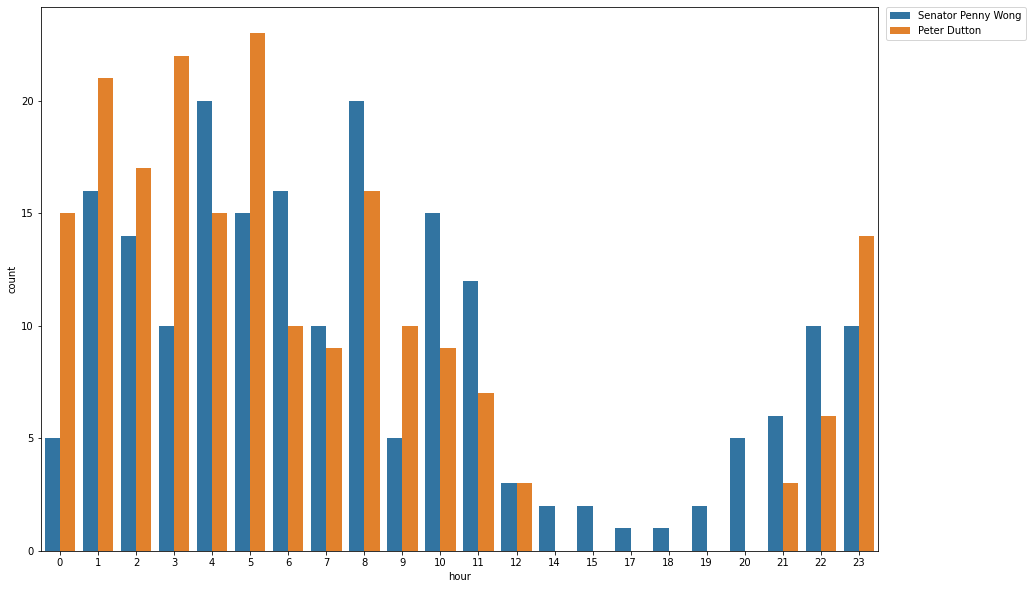

In [22]:
plt.figure(figsize=(15,10))
sn.countplot(data = t_work, x = "hour", hue = "user_name")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)


#### Twitter default uses a 12 hour clock in Australia and automatically changes to local time. Penny Wong has tweets all over the time range that may be caused by her travels to other countries using 24 hour clocks for Twitter. She seems to travel a lot as Senate Minister for Foreign Affairs recently.

### Q3.construct one bar chart of the proportions of tweets for each of the two users that contain pictures or links

pic can only be found in 'extended_entities',links are at "urls"     
https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/extended-entities

In [32]:
t1.dtypes

created_at                    object
id                             int64
id_str                        object
full_text                     object
truncated                       bool
display_text_range            object
entities                      object
extended_entities             object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
geo                           object
coordinates                   object
place                         object
contributors                  object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
possibly_sensitive            object
lang                          object
retweeted_status              object
quoted_status_id             float64
q

In [33]:
t1.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 1582667277161242624,
   'id_str': '1582667277161242624',
   'indices': [272, 295],
   'media_url': 'http://pbs.twimg.com/media/FfbDgNTUoAAMnV1.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/FfbDgNTUoAAMnV1.jpg',
   'url': 'https://t.co/e0a9yHx12P',
   'display_url': 'pic.twitter.com/e0a9yHx12P',
   'expanded_url': 'https://twitter.com/SenatorWong/status/1582667287588282368/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'large': {'w': 2048, 'h': 1366, 'resize': 'fit'},
    'small': {'w': 680, 'h': 454, 'resize': 'fit'},
    'medium': {'w': 1200, 'h': 800, 'resize': 'fit'}}}]}

In [35]:
#flatten dataframe to release urls(for url) and extended_entities(for pictures) 
entities1 = pd.json_normalize(t1["entities"])
urls1 = entities1["urls"]
hashtags1 = entities1["hashtags"]
q1_1 = pd.concat([t1_csv,urls1, t1.extended_entities,hashtags1],axis=1)
entities2 = pd.json_normalize(t2["entities"])
urls2 = entities2["urls"]
hashtags2 = entities2["hashtags"]
q1_2 = pd.concat([t2_csv,urls2, t2.extended_entities,hashtags2],axis=1)
q2 = pd.concat([q1_1,q1_2],axis = 0).reset_index(drop = True)
q2.head()


,created_at,user_name,full_text,urls,extended_entities,hashtags
0,Wed Oct 19 09:37:40 +0000 2022,Senator Penny Wong,Great to see the progress being made on the up...,[],"{'media': [{'id': 1582667277161242624, 'id_str...",[]
1,Wed Oct 19 07:38:57 +0000 2022,Senator Penny Wong,Wonderful to spend time with Sir Tom &amp; Lad...,[],"{'media': [{'id': 1582637401821761536, 'id_str...",[]
2,Wed Oct 19 04:06:59 +0000 2022,Senator Penny Wong,Delighted to be in Cook Islands to sign the 'O...,[],"{'media': [{'id': 1582584059258994688, 'id_str...",[]
3,Tue Oct 18 07:05:15 +0000 2022,Senator Penny Wong,Thanks to my Singaporean counterpart @VivianBa...,[],"{'media': [{'id': 1582266540065333248, 'id_str...",[]
4,Mon Oct 17 03:42:58 +0000 2022,Senator Penny Wong,RT @SenKatyG: A society where violence against...,[],NaN,[]


In [37]:
#create two columns of "have_urls" and "have_pic"
q2["have_urls"] = ""
for i in range(len(q2["urls"])):
    if q2["urls"][i] == []:
        q2["have_urls"][i] = "no"
    else:
        q2["have_urls"][i] = "yes"

q2['have_pic'] = ""
for i in range(len(q2)):
    if pd.isna(q2["extended_entities"][i]) == True:
        q2["have_pic"][i] = "no"
    else:
        q2["have_pic"][i] = "yes"

q2.head()

,created_at,user_name,full_text,urls,extended_entities,hashtags,have_urls,have_pic
0,Wed Oct 19 09:37:40 +0000 2022,Senator Penny Wong,Great to see the progress being made on the up...,[],"{'media': [{'id': 1582667277161242624, 'id_str...",[],no,yes
1,Wed Oct 19 07:38:57 +0000 2022,Senator Penny Wong,Wonderful to spend time with Sir Tom &amp; Lad...,[],"{'media': [{'id': 1582637401821761536, 'id_str...",[],no,yes
2,Wed Oct 19 04:06:59 +0000 2022,Senator Penny Wong,Delighted to be in Cook Islands to sign the 'O...,[],"{'media': [{'id': 1582584059258994688, 'id_str...",[],no,yes
3,Tue Oct 18 07:05:15 +0000 2022,Senator Penny Wong,Thanks to my Singaporean counterpart @VivianBa...,[],"{'media': [{'id': 1582266540065333248, 'id_str...",[],no,yes
4,Mon Oct 17 03:42:58 +0000 2022,Senator Penny Wong,RT @SenKatyG: A society where violence against...,[],NaN,[],no,no


In [41]:
q2_group = q2.groupby(["have_urls","have_pic","user_name"]).size().unstack()
q2_group

user_name           Peter Dutton  Senator Penny Wong
have_urls have_pic                                  
no        no                  96                  91
          yes                 76                  82
yes       no                  21                  25
          yes                  7                   2

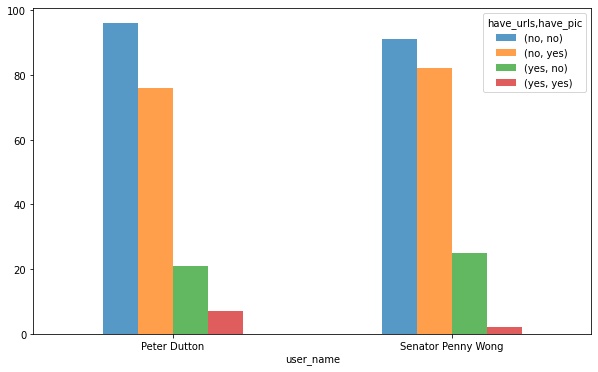

In [50]:
#https://stackoverflow.com/questions/59204445/how-to-do-i-groupby-count-and-then-plot-a-bar-chart-in-pandas
graph = q2.pivot_table(index = "user_name", columns = ["have_urls", "have_pic"], aggfunc = "size").plot(figsize = (10,6),kind ="bar",alpha=0.75, rot=0)


### Q4. histogram of the number of hashtags in tweets for each of the two users

In [66]:
#hashtags are not empty 
q_hash = q2[q2.astype(str)["hashtags"] != '[]'].reset_index(drop = True)
q_hash.head()

,created_at,user_name,full_text,urls,extended_entities,hashtags,have_urls,have_pic
0,Mon Oct 10 07:36:38 +0000 2022,Senator Penny Wong,"Happy Fiji Day to our #vuvale, who celebrate 5...",[],"{'media': [{'id': 1579375332095717376, 'id_str...","[{'text': 'vuvale', 'indices': [22, 29]}]",no,yes
1,Wed Sep 28 06:26:47 +0000 2022,Senator Penny Wong,"RT @ACIARAustralia: Today in the Senate, Minis...",[],NaN,"[{'text': 'ACIAR', 'indices': [99, 105]}]",no,no
2,Fri Sep 23 22:52:33 +0000 2022,Senator Penny Wong,RT @DrSJaishankar: Good to catch up with FM @S...,[],NaN,"[{'text': 'UNGA', 'indices': [129, 134]}]",no,no
3,Thu Sep 22 02:05:51 +0000 2022,Senator Penny Wong,Russia’s threats reinforce the danger nuclear ...,[],"{'media': [{'id': 1572769104658042880, 'id_str...","[{'text': 'CTBT', 'indices': [204, 209]}]",no,yes
4,Wed Sep 21 06:04:11 +0000 2022,Senator Penny Wong,RT @VivianBala: Good to catch up with Australi...,[],NaN,"[{'text': 'UNGA77', 'indices': [82, 89]}]",no,no


In [67]:
#q_hash["hashtags"][9][0]
#pd.json_normalize(q_hash["hashtags"])[0][0]["text"]

In [68]:
hash_text = pd.json_normalize(pd.json_normalize(q_hash["hashtags"])[0])["text"]
hash_text = hash_text.rename("hash_text")
q_hash = pd.concat([q_hash,hash_text],axis = 1)
q_hash.head()

,created_at,user_name,full_text,urls,extended_entities,hashtags,have_urls,have_pic,hash_text
0,Mon Oct 10 07:36:38 +0000 2022,Senator Penny Wong,"Happy Fiji Day to our #vuvale, who celebrate 5...",[],"{'media': [{'id': 1579375332095717376, 'id_str...","[{'text': 'vuvale', 'indices': [22, 29]}]",no,yes,vuvale
1,Wed Sep 28 06:26:47 +0000 2022,Senator Penny Wong,"RT @ACIARAustralia: Today in the Senate, Minis...",[],NaN,"[{'text': 'ACIAR', 'indices': [99, 105]}]",no,no,ACIAR
2,Fri Sep 23 22:52:33 +0000 2022,Senator Penny Wong,RT @DrSJaishankar: Good to catch up with FM @S...,[],NaN,"[{'text': 'UNGA', 'indices': [129, 134]}]",no,no,UNGA
3,Thu Sep 22 02:05:51 +0000 2022,Senator Penny Wong,Russia’s threats reinforce the danger nuclear ...,[],"{'media': [{'id': 1572769104658042880, 'id_str...","[{'text': 'CTBT', 'indices': [204, 209]}]",no,yes,CTBT
4,Wed Sep 21 06:04:11 +0000 2022,Senator Penny Wong,RT @VivianBala: Good to catch up with Australi...,[],NaN,"[{'text': 'UNGA77', 'indices': [82, 89]}]",no,no,UNGA77


Text(0, 0.5, 'Frequency')

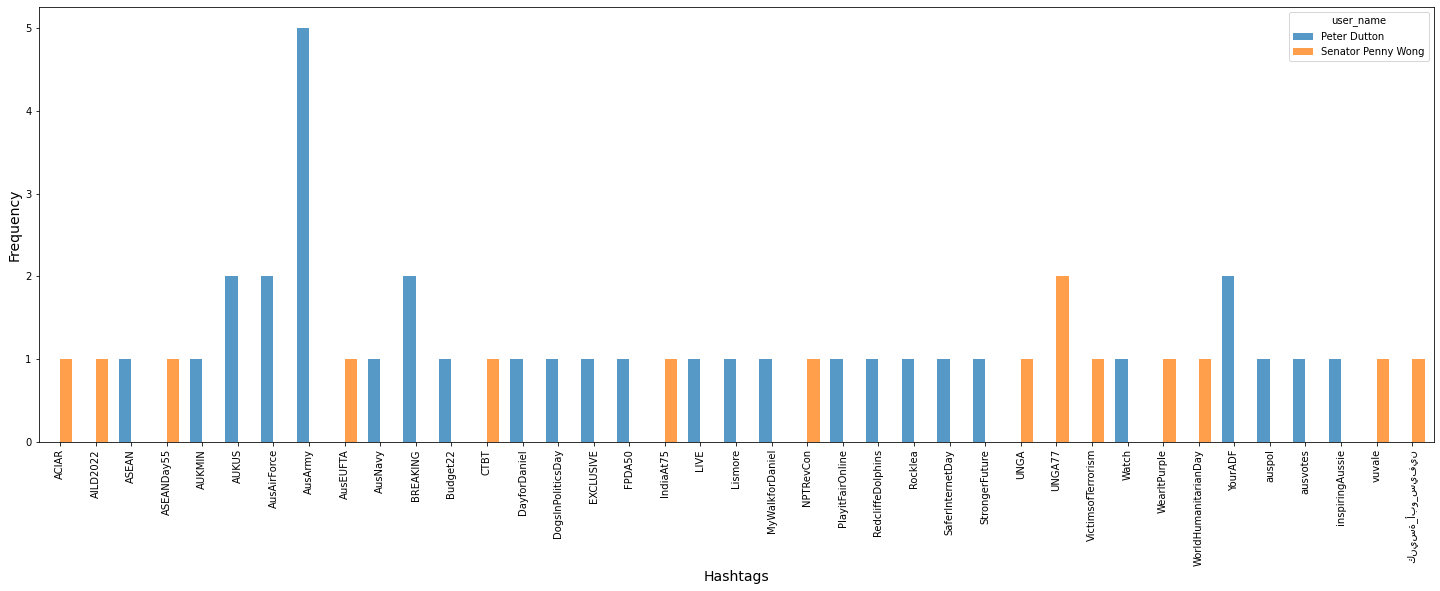

In [108]:
hash_his = q_hash.pivot_table(index = "hash_text", columns = ["user_name"],aggfunc = "size").plot(figsize = (25,8),kind = "bar",width = 0.7,alpha = 0.75)
hash_his.set_xlabel("Hashtags", fontdict={'fontsize':14})
hash_his.set_ylabel("Frequency", fontdict={'fontsize':14})

### Q5. Calculate the log odds ratio for each word used in the set of tweets, and list the 20 words most strongly associated with each of the two users

In [147]:
# extract full_text of tweets
text_df_w = q2[["user_name","full_text"]]
text_df_w = text_df_w[text_df_w["user_name"] == "Senator Penny Wong"]
text_df_w.head()

,user_name,full_text
0,Senator Penny Wong,Great to see the progress being made on the up...
1,Senator Penny Wong,Wonderful to spend time with Sir Tom &amp; Lad...
2,Senator Penny Wong,Delighted to be in Cook Islands to sign the 'O...
3,Senator Penny Wong,Thanks to my Singaporean counterpart @VivianBa...
4,Senator Penny Wong,RT @SenKatyG: A society where violence against...


In [148]:
#https://gist.github.com/bicachu/09cc71bb4b0e3711eaf1556b12fa7ad7
#text prepreparing
import pandas as pd
import re
import gensim
from nltk.stem import WordNetLemmatizer

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols

# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS \
                and len(token) > 2:  # drops words with less than 3 characters
            result.append(lemmatize(token))
    return result

def lemmatize(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')

def preprocess_tweet(tweet):
    """Main master function to clean tweets, stripping noisy characters, and tokenizing use lemmatization"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization
    tweet = ' '.join(tweet_token_list)
    return tweet

def basic_clean(tweet):
    """Main master function to clean tweets only without tokenization or removal of stopwords"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers
    tweet = re.sub('📝 …', '', tweet)
    return tweet

def tokenize_tweets(df):
    """Main function to read in and return cleaned and preprocessed dataframe.
    This can be used in Jupyter notebooks by importing this module and calling the tokenize_tweets() function
    Args:
        df = data frame object to apply cleaning to
    Returns:
        pandas data frame with cleaned tokens
    """

    df['tokens'] = df.full_text.apply(preprocess_tweet)
    num_tweets = len(df)
    print('Complete. Number of Tweets that have been cleaned and tokenized : {}'.format(num_tweets))
    return df


In [149]:
import nltk
#nltk.download('omw-1.4')
token_total = tokenize_tweets(q2)


Complete. Number of Tweets that have been cleaned and tokenized : 400


In [150]:
# Derive a Wong token data
token_w = q2[["user_name","tokens"]][q2["user_name"]== "Senator Penny Wong"]
#Split to single words 
all_words = []
for i in token_w["tokens"]:
    all_words.append(i.split())
all_words
#Pool all tokens to a corpus 
results_1 = []
for line in all_words:
    texts = ([word for word in line])
    results_1.extend(texts) # or results += texts
results_1
#Count how many times a token appeared in Wong's tweets 
c_1 = []
for i in results_1:
    c_1.append(results_1.count(i))
c_1
#Have a dataframe of Wong
odds_r1 = pd.DataFrame(c_1)
odds_r1["words"] = results_1
odds_r1["group"] = "Senator Penny Wong"
odds_r1.rename(columns = {0:"counts_w"},inplace= True)
odds_r1.head(10)

,counts_w,words,group
0,7,great,Senator Penny Wong
1,2,progress,Senator Penny Wong
2,1,upgrade,Senator Penny Wong
3,6,cook,Senator Penny Wong
4,15,islands,Senator Penny Wong
5,1,maritime,Senator Penny Wong
6,1,surveillance,Senator Penny Wong
7,6,centre,Senator Penny Wong
8,79,australia,Senator Penny Wong
9,5,assistance,Senator Penny Wong


In [151]:
# Derive a Wong token data
token_d = q2[["user_name","tokens"]][q2["user_name"]== "Peter Dutton"]
#Split to single words 
all_words_d = []
for i in token_d["tokens"]:
    all_words_d.append(i.split())
all_words_d
#Pool all tokens to a corpus 
results_2 = []
for line in all_words_d:
    texts_d = ([word for word in line])
    results_2.extend(texts_d) # or results += texts
results_2
#Count how many times a token appeared in Wong's tweets 
c_2 = []
for i in results_2:
    c_2.append(results_2.count(i))
c_2
#Have a dataframe of Wong
odds_r2 = pd.DataFrame(c_2)
odds_r2["words"] = results_2
odds_r2["group"] = "Peter Dutton"
odds_r2.rename(columns = {0:"counts_d"},inplace= True)
odds_r2.head()

,counts_d,words,group
0,8,thoughts,Peter Dutton
1,5,prayers,Peter Dutton
2,11,families,Peter Dutton
3,1,kill,Peter Dutton
4,3,senseless,Peter Dutton


In [164]:
#merge the two frames 
odds_total = odds_r1.merge(odds_r2,on = "words",how = "inner")
odds_total = odds_total.drop_duplicates()
odds_total.head()

,counts_w,words,group_x,counts_d,group_y
0,7,great,Senator Penny Wong,17,Peter Dutton
119,2,progress,Senator Penny Wong,1,Peter Dutton
121,1,upgrade,Senator Penny Wong,5,Peter Dutton
126,1,maritime,Senator Penny Wong,3,Peter Dutton
129,6,centre,Senator Penny Wong,1,Peter Dutton


In [222]:
#calculate logoddratio
ratio1 = (odds_total["counts_w"]+1)/odds_total["counts_w"].sum()
ratio2 = (odds_total["counts_d"]+1)/odds_total["counts_d"].sum()
odds_total["logoddsratio"] = np.log2(ratio1/ratio2)
#list the most significant 20 words 
odds_work = odds_total.sort_values(by = "logoddsratio",ascending = False )
odds_work = pd.concat([odds_work.iloc[:20],odds_work.iloc[-20:]])
odds_work

,counts_w,words,group_x,counts_d,group_y,logoddsratio
9127,22,foreign,Senator Penny Wong,1,Peter Dutton,3.380116
13414,10,queen,Senator Penny Wong,1,Peter Dutton,2.315986
10374,15,read,Senator Penny Wong,2,Peter Dutton,2.271592
13507,9,majesty,Senator Penny Wong,1,Peter Dutton,2.178482
11718,9,parliament,Senator Penny Wong,1,Peter Dutton,2.178482
5458,9,cooperation,Senator Penny Wong,1,Peter Dutton,2.178482
11752,8,right,Senator Penny Wong,1,Peter Dutton,2.026479
13499,8,elizabeth,Senator Penny Wong,1,Peter Dutton,2.026479
11542,21,share,Senator Penny Wong,4,Peter Dutton,1.994058
5637,40,meet,Senator Penny Wong,9,Peter Dutton,1.892178


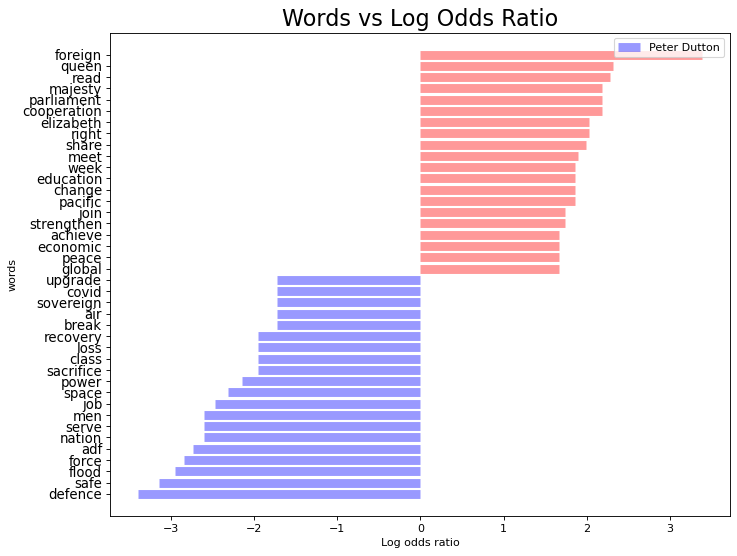

In [224]:
#https://www.geeksforgeeks.org/diverging-bar-chart-using-python/#:~:text=Python%20doesn't%20have%20a,represent%20them%20as%20horizontal%20bars.
for i in range(len(odds_work)):
    odds_work["colors"] = ["blue" if float(x) < 0 else "red" for x in odds_work["logoddsratio"]]
# Sort values from lowest to highest
odds_work.sort_values("logoddsratio", inplace = True)
odds_work.reset_index(inplace = True)
odds_work
plt.figure(figsize = (10,8), dpi = 80)
plt.hlines(y = odds_work.index, xmin = 0, xmax = odds_work["logoddsratio"],
          color = odds_work["colors"],alpha = 0.4, linewidth = 8)
plt.gca().set(ylabel = "words", xlabel = "Log odds ratio")
plt.yticks(odds_work.index,odds_work["words"],fontsize = 12)
plt.title("Words vs Log Odds Ratio", fontdict = {"size":20})
#plt.gca().legend(('y0','y1'))
plt.gca().legend(("Peter Dutton","Senator Penny Wong"))
plt.show()

#### The 20 words that distinguish the tweets of Wong and Dutton are listed as the above. We can see "foreign" is the most important word for Wong, "defense" is the most important word for Dutton which is consistent with the identities of the two politicians.

### Q6.vaderSentiment

In [735]:
#! pip install vaderSentiment

In [226]:
#Get compound scores 
analyzer = SentimentIntensityAnalyzer()
vs = []
for sentence in token_total["tokens"]:
    vs.append(analyzer.polarity_scores(sentence))
    #print("{:-<65} {}".format(sentence, str(vs)))
tweets_vs = pd.DataFrame(vs)
tweets_vs["word"] = token_total["tokens"]
tweets_vs.head(10)

,neg,neu,pos,compound,word
0,0.000,0.637,0.363,0.8860,great progress upgrade cook islands maritime s...
1,0.000,0.659,0.341,0.8979,wonderful spend time sir tom amp lady marsters...
2,0.081,0.638,0.281,0.7845,delight cook islands sign tumanava cook island...
3,0.000,0.714,0.286,0.7650,thank singaporean counterpart warm constructiv...
4,0.409,0.409,0.181,-0.5994,society violence women amp children address so...
5,0.200,0.571,0.229,0.1027,rochester victoria see devastation flood premi...
6,0.000,0.541,0.459,0.7783,wonderful catch respect pacific elder visit me...
7,0.256,0.513,0.231,0.1531,albanese government expand pay parental leave ...
8,0.000,0.497,0.503,0.7964,australia design new development policy develo...
9,0.000,0.790,0.210,0.7269,australian voice hear air republic marshall is...


In [227]:
# Get sentiment labels based on compound scores
tweets_vs["label"] = ""

for i in tweets_vs["compound"]:
    if i >= 0.05:
        tweets_vs["label"] = "positive"
    elif i <= -0.05:
        tweets_vs["label"] = "negative"
    else:
        tweets_vs["label"] = "neutral"
tweets_vs.head(10)

,neg,neu,pos,compound,word,label
0,0.000,0.637,0.363,0.8860,great progress upgrade cook islands maritime s...,negative
1,0.000,0.659,0.341,0.8979,wonderful spend time sir tom amp lady marsters...,negative
2,0.081,0.638,0.281,0.7845,delight cook islands sign tumanava cook island...,negative
3,0.000,0.714,0.286,0.7650,thank singaporean counterpart warm constructiv...,negative
4,0.409,0.409,0.181,-0.5994,society violence women amp children address so...,negative
5,0.200,0.571,0.229,0.1027,rochester victoria see devastation flood premi...,negative
6,0.000,0.541,0.459,0.7783,wonderful catch respect pacific elder visit me...,negative
7,0.256,0.513,0.231,0.1531,albanese government expand pay parental leave ...,negative
8,0.000,0.497,0.503,0.7964,australia design new development policy develo...,negative
9,0.000,0.790,0.210,0.7269,australian voice hear air republic marshall is...,negative


#### Average compound score of each user

In [228]:
tweets_vs["user_name"] = token_total["user_name"]
tweets_vs.head(10)

,neg,neu,pos,compound,word,label,user_name
0,0.000,0.637,0.363,0.8860,great progress upgrade cook islands maritime s...,negative,Senator Penny Wong
1,0.000,0.659,0.341,0.8979,wonderful spend time sir tom amp lady marsters...,negative,Senator Penny Wong
2,0.081,0.638,0.281,0.7845,delight cook islands sign tumanava cook island...,negative,Senator Penny Wong
3,0.000,0.714,0.286,0.7650,thank singaporean counterpart warm constructiv...,negative,Senator Penny Wong
4,0.409,0.409,0.181,-0.5994,society violence women amp children address so...,negative,Senator Penny Wong
5,0.200,0.571,0.229,0.1027,rochester victoria see devastation flood premi...,negative,Senator Penny Wong
6,0.000,0.541,0.459,0.7783,wonderful catch respect pacific elder visit me...,negative,Senator Penny Wong
7,0.256,0.513,0.231,0.1531,albanese government expand pay parental leave ...,negative,Senator Penny Wong
8,0.000,0.497,0.503,0.7964,australia design new development policy develo...,negative,Senator Penny Wong
9,0.000,0.790,0.210,0.7269,australian voice hear air republic marshall is...,negative,Senator Penny Wong


In [229]:
tweets_vs.groupby("user_name").mean().compound

user_name
Peter Dutton          0.293883
Senator Penny Wong    0.337724
Name: compound, dtype: float64

#### The average compound scores of Dutton and Wong are fairly similar(Dutton is 0.29, Wong is 0.31) which are greater than 0.05. The sentiment of their tweets are considered as "positive". 